In [16]:
#library(treeio)
library(ggtree)
library(ape)
library("phangorn")
library(phytools)
#library(plotrix)
library(tidytree)
library(dplyr)
library(tidyverse)

ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166 


Attaching package: ‘ggtree’


The following object is masked from ‘package:tidyr’:

    expand


The following object is masked from ‘pac

In [9]:
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")

In [10]:
taxo_mat <- as.data.frame(POR_taxo_4_analysis) %>%
  rownames_to_column %>%
column_to_rownames("rowname")  %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species))

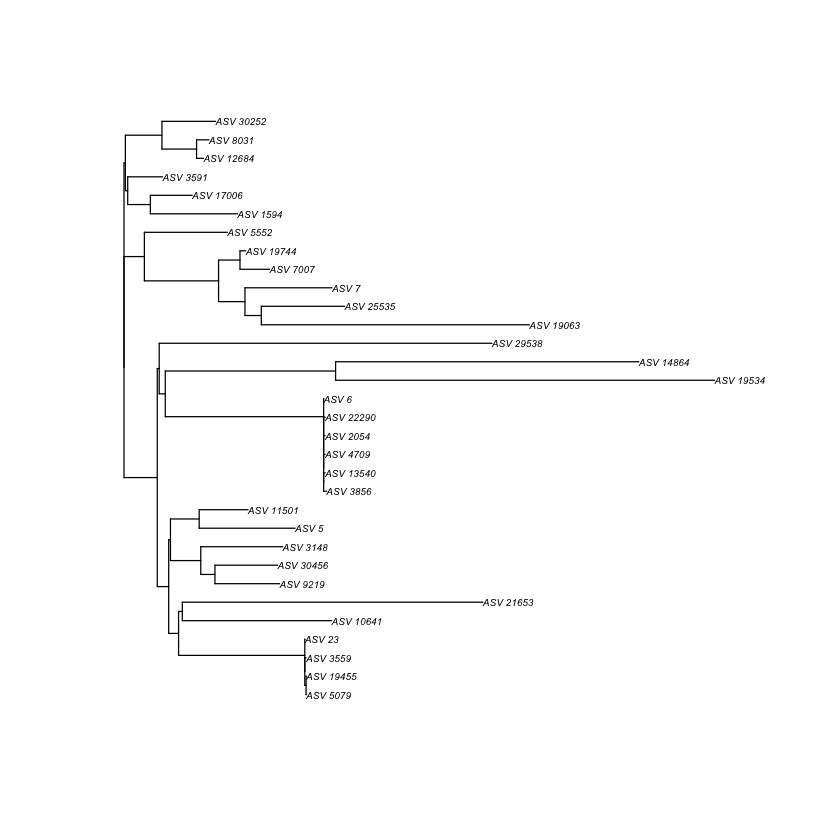

In [11]:
target <- c("ASV_5", 'ASV_6', 'ASV_7','ASV_23')

#tree <- phytools::read.newick('rosales/gtdbtk.bac12016BINS.classify.tree')
tree <- phytools::read.newick('/Users/stephanie.rosales/Desktop/POR_fitgtr_tree.nwk')
inds <- which(tree$tip.label %in% target)

ans <- NULL
depth_nodes <- 5
max_sisters <- 5
for(x in inds) {
  now <- x
  temp <- NULL
  temp1 <- NULL
  for(y in 1:depth_nodes) {
    temp <- Descendants(tree,Siblings(tree,now)[[1]])[[1]]
    temp <- temp[!temp %in% c(temp1,inds)]
    temp <- sample(temp, min(length(temp), max_sisters))
    temp1 <- c(temp,temp1)
    now <- Ancestors(tree,now,'parent')
  }
  ans <- unique(c(ans,temp1))
}

newtree <- keep.tip(tree,c(ans,inds))
plot(ladderize(newtree),cex=0.5)


In [12]:
#make tree into tibble
x <- as_tibble(newtree)
head(x)
dim(x)


parent,node,branch.length,label
<int>,<int>,<dbl>,<chr>
35,1,0.16746331,ASV_3591
36,2,0.41867399,ASV_1594
36,3,0.20097254,ASV_17006
38,4,0.03348391,ASV_12684
38,5,0.05931532,ASV_8031
37,6,0.25824097,ASV_30252


[1] 63  4

In [13]:
taxa_for_tree = taxo_mat %>% 
as.data.frame() %>%
rownames_to_column("label") 

In [14]:
y = x %>% left_join(taxa_for_tree, "label") %>% mutate(label = coalesce(family, label)) %>%
mutate(across('label', str_replace, "ASV_5$", "ASV_5:core")) %>%
  mutate(across('label', str_replace, "ASV_6$", "ASV_6:core")) %>%
   mutate(across('label', str_replace, "ASV_7$", "SAR324:core")) %>%
mutate(across('label', str_replace, "ASV_23$", "Cyanobiaceae:core")) 
head(y)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across("label", str_replace, "ASV_5$", "ASV_5:core")`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


parent,node,branch.length,label,domain,phylum,class,order,family,genus,species
<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
35,1,0.16746331,Litoricolaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Litoricolaceae,Litoricola,NA
36,2,0.41867399,ASV_1594,NA,NA,NA,NA,NA,NA,NA
36,3,0.20097254,ASV_17006,Bacteria,NA,NA,NA,NA,NA,NA
38,4,0.03348391,ASV_12684,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
38,5,0.05931532,ASV_8031,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA
37,6,0.25824097,Cellvibrionaceae,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Pseudoteredinibacter,NA


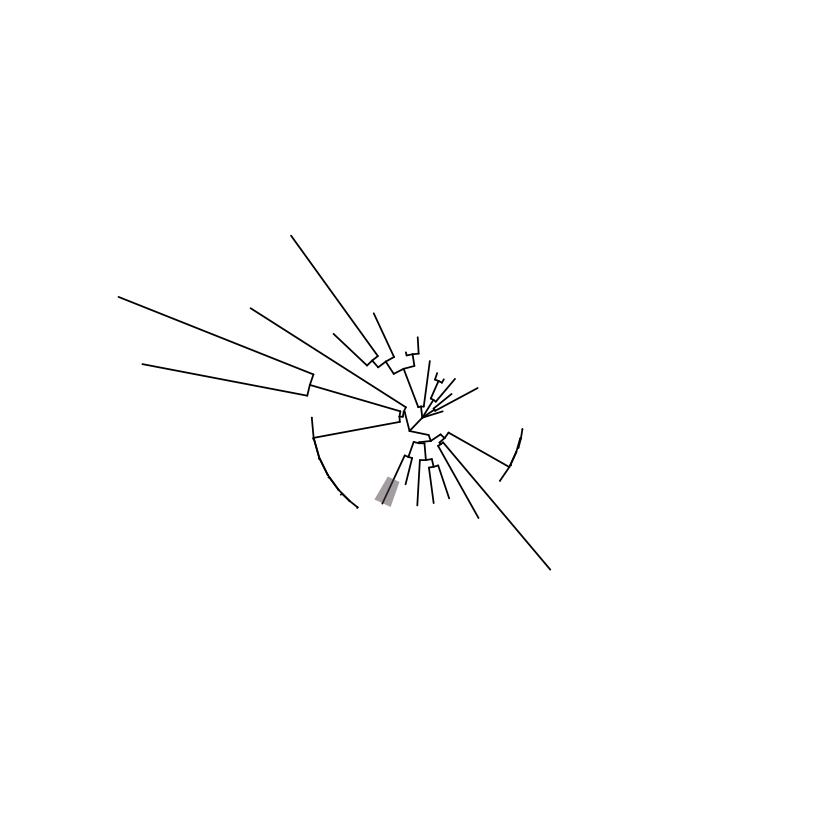

In [20]:
 y %>% 
as.phylo %>%
ggtree(layout = 'circular') +
geom_hilight(node=25, fill="#5a4a54") 